# Data Analyst Nanodegree
## Intro to Data Analysis
## Project: Investigate a Dataset
----

# Getting Started

To begin working with the Titanic passenger data, we'll first need to import the functionality we need, and load our data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
# %matplotlib inline # Pretty display for notebooks

csv_file = "titanic_data.csv"
data = pd.read_csv(csv_file) #csv파일 불러오기

data.head() #상위 5개만 출력

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


And here is a list of features:

- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

And then, we can make a function of survival percentage for each feature.

In [2]:
def filter_data(data, condition):
    field, operator, value = condition.split(" ", 2) #공백으로. default가 공백.
    #파라미터로 숫자를 적어주면, 뒤에 공백이 여러개 있어도 각 앞부터 공백 단위로 잘라 넣는다.
    
    #field
    if field not in data.columns.values: #필드값이 없으면 오류
        raise Exception("'{}' is not a feature of the dataframe.".format(field))
    if " " in value: #값에 공백 있으면 오류
        raise Exception("'{}' is uncorrect value.".format(value))
        
    #value
    try:
        value = float(value)
    except:
        value = value.strip("\'\"") #strip문자열 양쪽 공백을 모두 지운다. default가 공백
        #파라미터로 특정 문자를 지정하면, 그것을 지운다.
    
    #operator
    if operator == ">":
        matches = data[field] > value
    elif operator == "<":
        matches = data[field] < value
    elif operator == ">=":
        matches = data[field] >= value
    elif operator == "<=":
        matches = data[field] <= value
    elif operator == "==":
        matches = data[field] == value
    elif operator == "!=":
        matches = data[field] != value
    else:
        raise Exception("Invalid comparison operator. Only >, <, >=, <=, ==, != allowed.")
    #T/F Series로 반환한다. 따라서 여기서 True 된 것으로 다시 DataFrame 생성해야.
    
    data = data[matches].reset_index(drop = True)
    #reset_index로 이전에 있던 인덱스를 새로운 열로 생성되어 삽입되고(가장 첫째 열에 들어간다.) 인덱스를 새로 만들어 부여한다.
    #drop=True로 설정하면 이전 인덱스를 버린다.
    
    return data

In [3]:
def filtered_data(data, filters = []):
    for condition in filters: #ex) ["Pclass == 1", "Age < 22"]
        data = filter_data(data, condition)
        
    return data

In [4]:
filtered_data(data, ["Pclass == 1", "Age < 15"])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
1,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,436,1,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.0000,B96 B98,S
3,446,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,A34,S
4,803,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,B96 B98,S


It works well. But, chart will help to understand the data. Let's implement plot function.

In [5]:
def show_plot(data, key = "", filters = [], **kwargs):
    #*args, **kwargs : 파라미터를 몇 개 받을 지 모르는 경우 설정.
    #*args : 파라미터를 몇개를 받을지 모르는 경우 사용한다. args 는 튜플 형태로 전달된다.
    #**kwargs : 파라미터 명을 같이 보낼 수 있다. kwargs는 딕셔너리 형태로 전달된다.
    #http://jhproject.tistory.com/109
    
    if not key:
        raise Exception("No key has been provided. Make sure you provide a variable on which to plot the data.")
    if key not in data.columns.values:
        raise Exception("'{}' is not a feature of the dataframe".format(key))
        
    if sum(pd.isnull(data[key])) != 0:
        data = data[~np.isnan(data[key])] #NaN이 아닌 값을 불러와서 다시 데이터 프레임에 삽입 = NaN 제거
    
    data = filtered_data(data, filters)
    plt.figure(figsize=(8,6)) #https://matplotlib.org/api/figure_api.html
    #기본적 설정. 서브 프레임을 만들거나, 크기를 바꾸는 등의 설정을 하는 데 사용한다.
    
    if key == "Age" or key == "Fare": #키가 숫자로 되어 있을 경우. 히스토그램
        if kwargs and 'n_bins' in kwargs and 'bin_width' in kwargs: #함께 쓸 수 없다.
            raise Exception("Arguments 'n_bins' and 'bin_width' cannot be used simultaneously.")

        min_value = data[key].min()
        max_value = data[key].max()
        value_range = max_value - min_value
        n_bins = 10
        bin_width = float(value_range) / n_bins

        #기본값 외에 따로 설정한 옵션이 있으면 적용
        if kwargs and 'n_bins' in kwargs: #kwargs(추가 옵션)이 존재하고 그 옵션 중에 "n_bins"가 있을 시
            n_bins = int(kwargs['n_bins'])
            bin_width = float(value_range) / n_bins
        elif kwargs and 'bin_width' in kwargs:
            bin_width = kwargs['bin_width'] #kwargs(추가 옵션)이 존재하고 그 옵션 중에 "bin_width"가 있을 시
            n_bins = int(np.ceil(float(value_range) / bin_width))
        
        if kwargs and 'boundary' in kwargs: #kwargs(추가 옵션)이 존재하고 그 옵션 중에 "boundary"가 있을 시
            bound_factor = np.floor(( min_value - kwargs['boundary'] ) / bin_width)
            min_value = kwargs['boundary'] + bound_factor * bin_width
            if min_value + n_bins * bin_width <= max_value:
                n_bins += 1
                
        bins = np.arange(0, data[key].max() + 10, 10) #히스토그램 각 막대의 단위
    
        nonsurv_vals = data[data['Survived'] == 0][key].reset_index(drop = True)
        #data에서 사망 + key값으로 데이터 가져오기.
        surv_vals = data[data['Survived'] == 1][key].reset_index(drop = True)
        #data에서 생존 + key값으로 데이터 가져오기.
        
        #reset_index로 이전에 있던 인덱스를 새로운 열로 생성되어 삽입되고(가장 첫째 열에 들어간다.) 인덱스를 새로 만들어 부여한다.
        #drop=True로 설정하면 이전 인덱스를 버린다.
        
        plt.hist(nonsurv_vals, bins = bins, alpha = 0.6, color = 'r')
        plt.hist(surv_vals, bins = bins, alpha = 0.6, color = 'g')
        
    else: #키가 카테고리 인 경우
        values = np.sort(data[key].unique()) #x축 범례 만들기 위해 데이터 변형 전 미리 저장
        
        data['count'] = 1 #각 행에 count라는 열 추가하고 값을 1로 넣는다.
        data = data.groupby([data[key], data["Survived"]], as_index = False).count()
        #groupby : 해당 키로 그룹을 생성한다. 그 뒤 count(), describe()등으로 세부 정보 확인 가능 
        #as_index = False를 하지 않으면 키가 색인으로 된다.
        #count함수로 각 그룹의 수를 세는데, count 열을 생성 했기에 이 값이 count 열에도 적용된다.

        levels = data[key].unique() #중복되지 않는 키 값의 배열. 키의 카테고리 배열.
        n_levels = len(levels) #카테고리 수
        bar_width = 0.8

        for i in range(n_levels): #키의 카테고리 수 만큼 루프 돌면서 바 그래프를 그려 추가한다.
            bar_color = "r" if i%2 == 0 else "g"
            bar = plt.bar(i - bar_width/2, data.loc[i]['count'], width = bar_width, color=bar_color) 
          
        plt.xticks(np.arange(0, len(levels), 2), values) #x축 틱 정보
    
    red_patch = mpatches.Patch(color='r', label='Not survived') #패치를 따로 만들어 범례 삽입
    green_patch = mpatches.Patch(color='g', label='Survived') #패치를 따로 만들어 범례 삽입
    plt.legend(handles=[red_patch, green_patch], framealpha = 0.8)
    #https://matplotlib.org/users/legend_guide.html
    
    key_name = ' '.join([x.capitalize() for x in key.split('_')])
    plt.xlabel(key_name)
    plt.ylabel("Number of Passengers")
    plt.title("Passenger Survival Statistics With '{}' Feature".format(key_name))
    plt.show()

And we can also make description function.

In [6]:
def show_stats(data, key = "", filters = []):
    n_data_all = data.shape[0]
    
    if sum(pd.isnull(data[key])) != 0:
        data = data[~np.isnan(data[key])] #NaN이 아닌 값을 불러와서 다시 데이터 프레임에 삽입 = NaN 제거
    
    data = filtered_data(data, filters)
    
    # Compute number of data points that met the filter criteria.
    n_data = data.shape[0]

#     mean = data['Survived'].mean() #평균
#     qtiles = data['Survived'].quantile([.25, .5, .75]).as_matrix()
    #quantile 사분위수를 만들어 낸다.
    #https://datascienceschool.net/view-notebook/76dcd63bba2c4959af15bec41b197e7c/
    #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html
    
    # Report computed statistics if verbosity is set to True (default).
    if filters:
        print("There are {:d} data points ({:.2f}%) matching the filter criteria.".format(n_data, 100. * n_data / n_data_all))
    else:
        print("There are {:d} data points in the dataset.".format(n_data))
        
    print("This group's survival percentage is ({:.2f}%)".format(100. * np.sum(data["Survived"]) / n_data))
    

In [7]:
show_stats(data.copy(), "Sex", ["Sex == 'male'"])

There are 577 data points (64.76%) matching the filter criteria.
This group's survival percentage is (18.89%)


# Data Wrangling
----

And then, let's check out data. We have some '*NaN*' data. For our analysis accuracy, we should clean our data.

In [8]:
data.isnull().sum() #null인 값을 합쳐서 보여준다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are a lot of *NaN* data. It can be negative effect for our analysis. So, we should drop *NaN* data. But 'Cabin' feature isn't important for our analysis. Because it just mean cabin number of the passenger. But, if we just use *data.dropna()*, a lot of data will be dropped. So first of all, we should drop 'Cabin' column.

In [9]:
data = data.drop("Cabin", axis = 1)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


And then, we can use *data.dropna()* for dropping NaN data. But, as you know, when we use this function, At least 177 data will be dropped. Because 'Age' feature has 177 *NaN* data. It is quite a lot. So, it can be effected to our analysis. So, we can chose other way. So in my opinion, just add some code block for checking NaN data is better.

    if sum(pd.isnull(data[key])) != 0:
        data = data[~np.isnan(data[key])]
        
So, we can add this code block in *show_plot* and *show_state* function.

# Analysis
----
> one of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class. - [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)

Out main goal is that **"What factors made people more likely to survive?"** Especially, there are our detailed goals.

- I heard that women and children had been survived more than man and adult. Is it collect?
- It is commod that the rich have more survival percentage than the poor. Is it collect?
- Then, Which a person have more survival percentage between the rich male adult and the poor female child? 

So, we will analysis each feature and found which feature is important for our goal.

### Q1. I heard that women and children had been survived more than man and adult. Is it collect?

First of all, we can compare men and women.

In Total : 
There are 891 data points in the dataset.
This group's survival percentage is (38.38%)

In Male : 
There are 577 data points (64.76%) matching the filter criteria.
This group's survival percentage is (18.89%)

In Female : 
There are 314 data points (35.24%) matching the filter criteria.
This group's survival percentage is (74.20%)


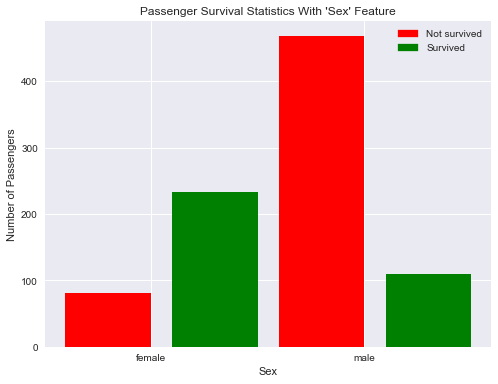

In [10]:
print("In Total : ")
show_stats(data.copy(), "Sex")
print("\nIn Male : ")
show_stats(data.copy(), "Sex", ["Sex == 'male'"])
print("\nIn Female : ")
show_stats(data.copy(), "Sex", ["Sex == 'female'"])
show_plot(data.copy(), "Sex")

male's survival percentage is *18.89%*. But female's survival percentage is *74.20%*. Actually, If they were in the same environment, a women would be survived. And then, let's compare adult and child. Before then, we should define adult age. Just set 10 years old.

There are 64 data points (7.18%) matching the filter criteria.
This group's survival percentage is (59.38%)


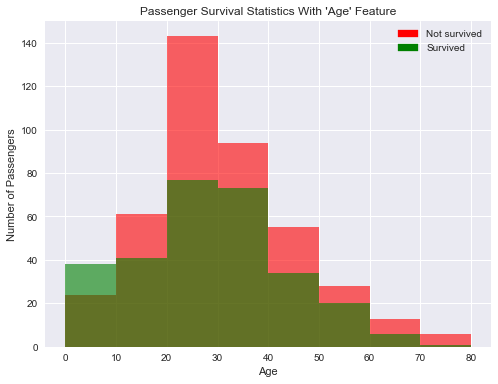

In [11]:
show_stats(data.copy(), "Age", ["Age <= 10"])
show_plot(data.copy(), "Age")

According to a graph, 0 to 10 is the only range where the survival rate is higher than the non survival rate. And this group's survival percentage is 59.38%. I think this rate is pretty high. And we can also check female children's survival percentage.

Female children :
There are 31 data points (3.48%) matching the filter criteria.
This group's survival percentage is (61.29%)

Male adults :
There are 350 data points (39.28%) matching the filter criteria.
This group's survival percentage is (18.29%)


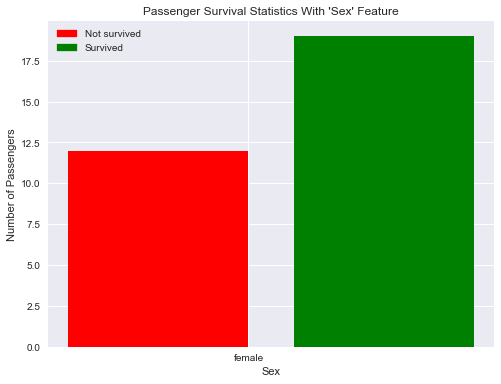

In [12]:
print("Female children :")
show_stats(data.copy(), "Age", ["Age <= 10", "Sex == female"])
print("\nMale adults :")
show_stats(data.copy(), "Age", ["Age >= 21", "Sex == male"])
show_plot(data.copy(), "Sex", ["Age <= 10", "Sex == female"])

According to result, we can find female children had been survived more than male adults. But, women's total survival percentage was 74.20%. It was much higher than female childrens' (61.29%). I think female children's data is quite small(3.48%). To improve our model, we need more data. Actually our total data is just 891. It's not enough to analysis. 

### Q2.It is common that the rich have more survival percentage than the poor. Is it collect?

We don't have accurate for personal income. But we can assume personal income by 'Pclass' feature. But, 'Fare' is not enough for this analysis. Because, this feature include people traveling together. So, I think 'Pclass' is better than 'Fare'

In class 1
There are 216 data points (24.24%) matching the filter criteria.
This group's survival percentage is (62.96%)

In class 3
There are 491 data points (55.11%) matching the filter criteria.
This group's survival percentage is (24.24%)


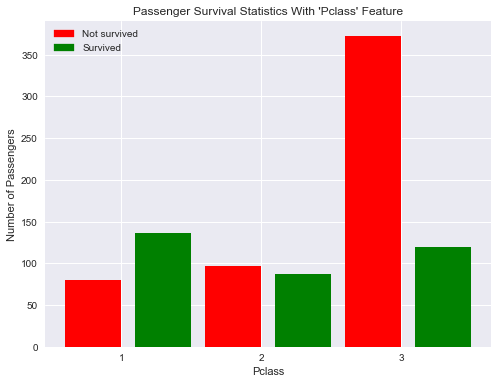

In [13]:
print("In class 1")
show_stats(data.copy(), "Pclass", ["Pclass == 1"])
print("\nIn class 3")
show_stats(data.copy(), "Pclass", ["Pclass == 3"])

show_plot(data.copy(), "Pclass")

A survival percentage in first class is much higher than third class.

### Q3. Then, Which a person have more survival percentage between the rich male adult and the poor female child?

Final question is little competitive. Because we found effect of features:

| feature 	| effect 	|
|:-----:	|:------:	|
|   male  	|     -     |
|   female  |     +     |
|   rich   	|     +     |
|   poor   	|     -     |
|   adult   |     -     |
|   child   |     +     |


So, this question is mixed features. Let's dive in to the deep.

In [15]:
print("the rich male adult : ")
show_stats(data.copy(), "Pclass", ["Pclass == 1", "Sex == male", "Age >= 21"])
print("\nthe poor female child : ")
show_stats(data.copy(), "Pclass", ["Pclass == 3", "Sex == female", "Age <= 10"])

the rich male adult : 
There are 94 data points (10.55%) matching the filter criteria.
This group's survival percentage is (38.30%)

the poor female child : 
There are 22 data points (2.47%) matching the filter criteria.
This group's survival percentage is (50.00%)


Actually, second group had high survival percentage. 

# Conclusion
----

I think 'Sex' is the most important feature in this project.

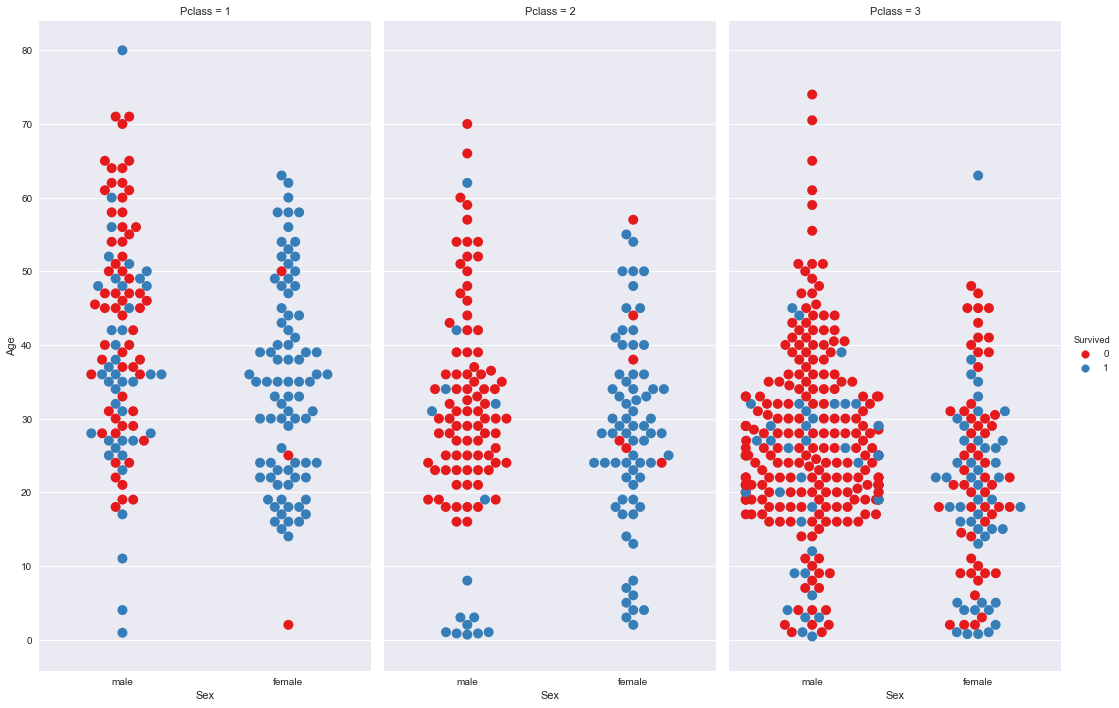

In [16]:
sns.factorplot(data=data, col='Pclass', x='Sex', y='Age', hue='Survived', 
               kind='swarm', size=10, aspect=0.5, s=10, palette="Set1")
#https://seaborn.pydata.org/

plt.show()

But, as I said, it's not enough data. And we dropped almost 170 data for wrangling. So we can learn that sometimes collect a lot of meaningful data is more important than the analysis. 